# PHY 102 Lab - Introduction to Jupyter

Refer to the handout for instructions!

## Step 1

In [84]:
print("Hello World!") 

Hello World!


## Step 2

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib import animation
from scipy.integrate import odeint
plt.rcParams['text.usetex'] = True
%matplotlib notebook

print("All done!")

All done!


## Step 3

In [87]:
# The code below is missing a parenthesis
# Also, the object referenced at the end of 
# line 5 isn't correct
name = "PHY 102"
print("This course is {0}".format(course)

This course is PHY 102


## Step 4

<IPython.core.display.Javascript object>


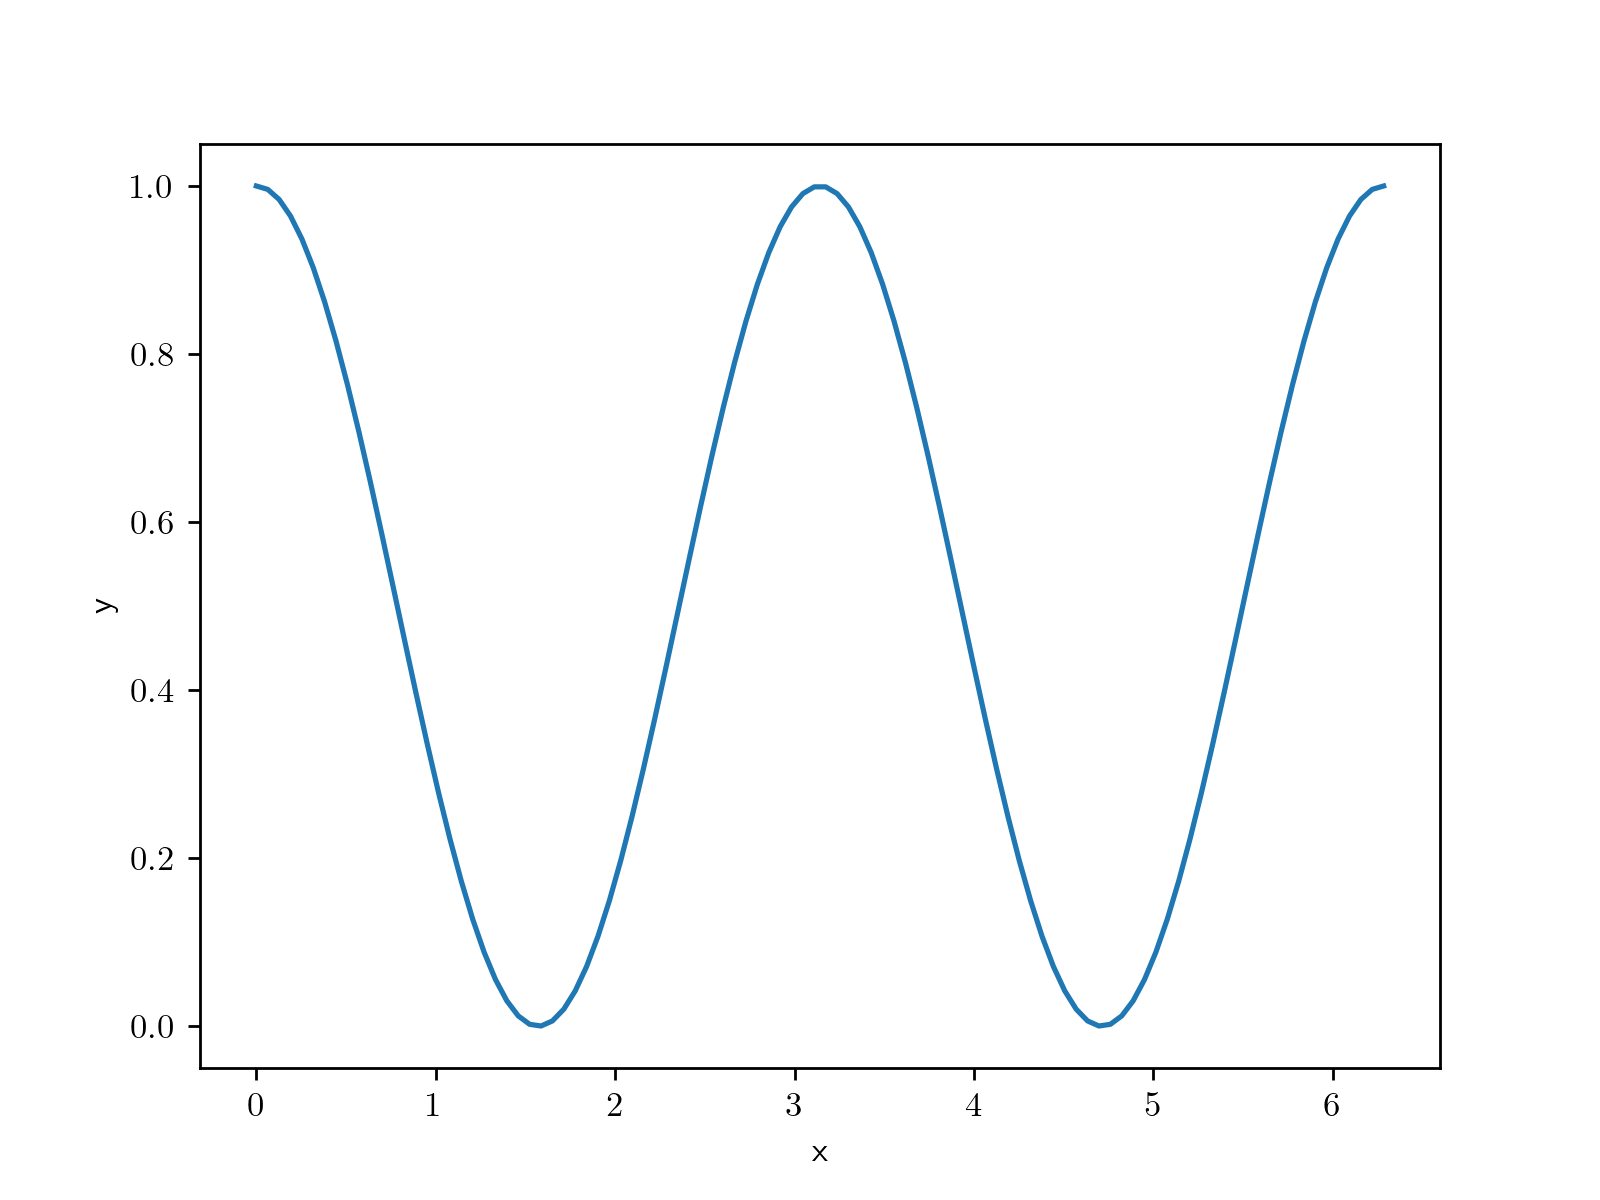

In [89]:
# Create the values for the x axis
# x will be an array of 100 evenly spaced
# values from 0 to 2pi
x = np.linspace(0,2*np.pi,100)

# Perform some mathematics on x.
# We use Numpy ("np.") to immediately perform math
# on every value in the array
y = np.cos(x)

# make a simple figure
plt.figure()
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Step 5

<IPython.core.display.Javascript object>


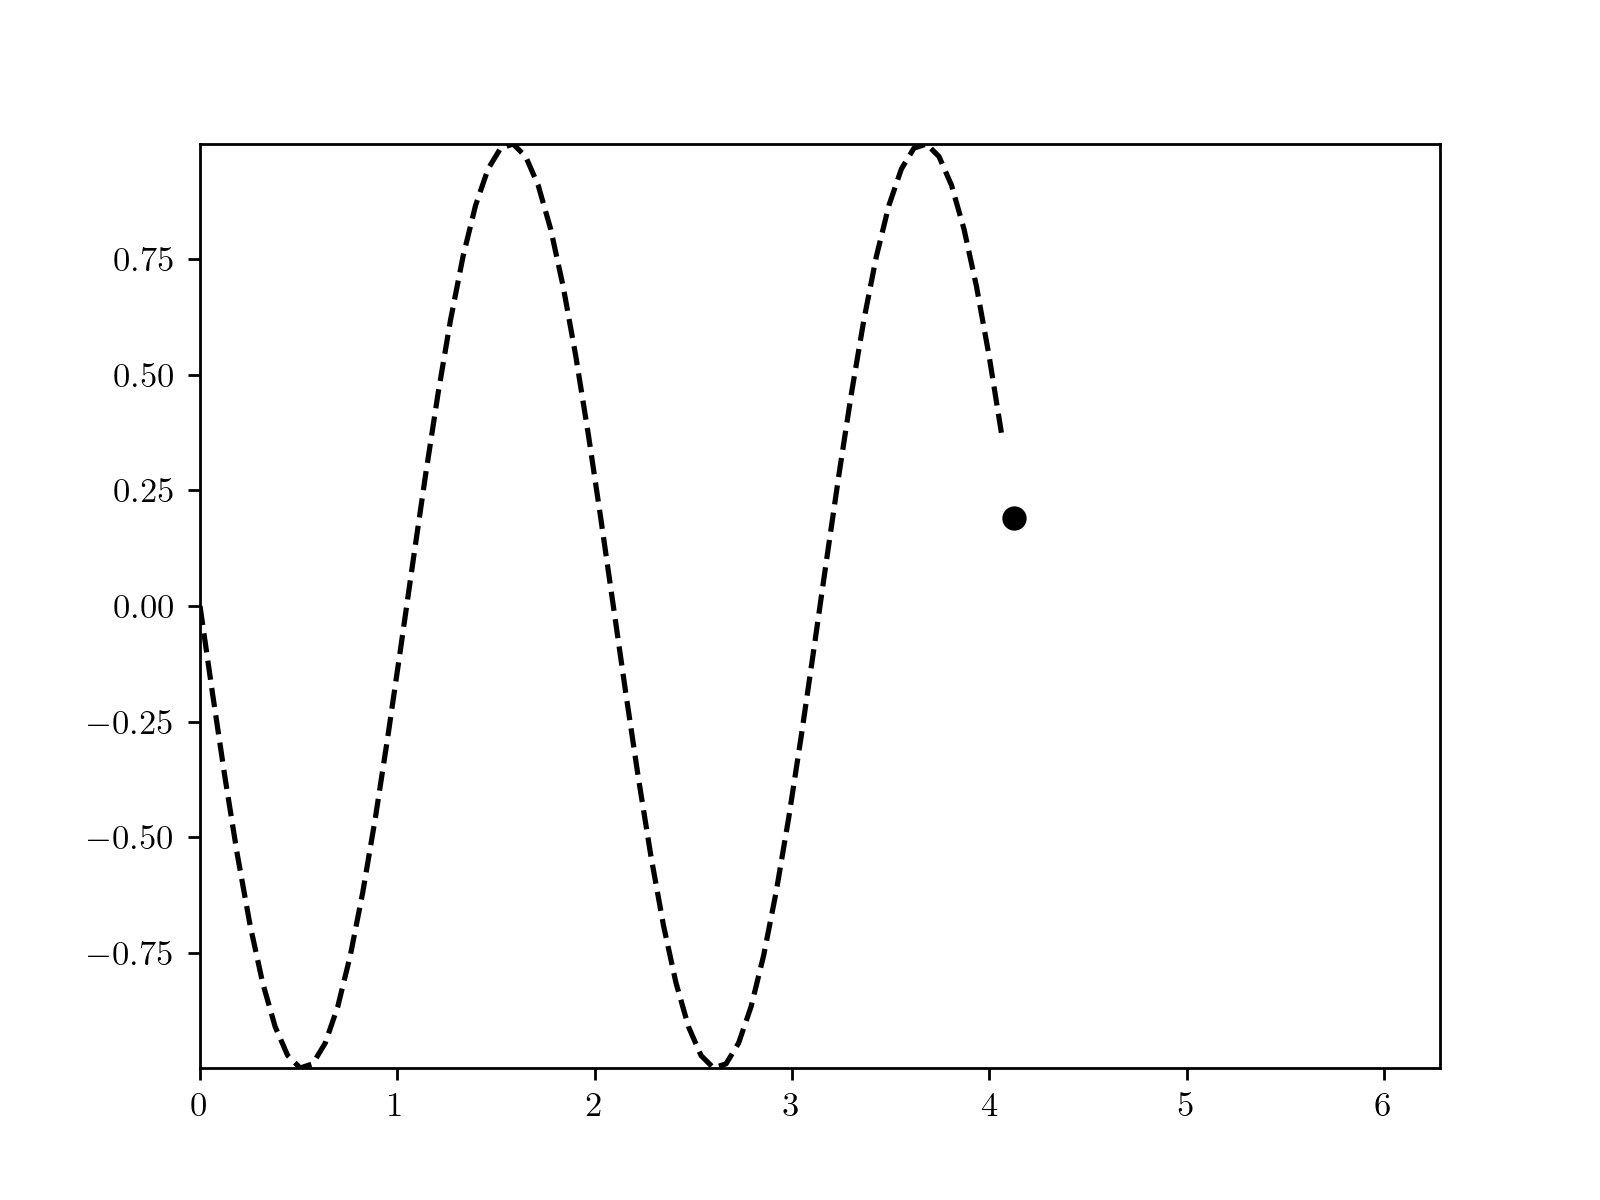

In [91]:
# You should only modify line 15!

def update(i):
    # Used to update animated figure
    # "i" refers to the movie frame or specific value 
    # in the data arrays
    marker.set_offsets([x[i],y[i]])
    
    # For the line, we use the colon to say 
    # "draw the curve from the beginning up to index i"
    line.set_data([x[:i],y[:i]])

# Make the data
x = np.linspace(0,2*np.pi,100)
y = np.sin(x)

# Make the figure
fig = plt.figure()
marker = plt.scatter(x[0],y[0],color='k')  # Draw a dot and a line
line, = plt.plot([],[],'k--')
plt.xlim(min(x),max(x))                    # Set the viewing window
plt.ylim(min(y),max(y))
plt.show()

# Animate it
ani = animation.FuncAnimation(fig, update, frames=100, interval=20, repeat_delay=300)


## Step 6

<IPython.core.display.Javascript object>


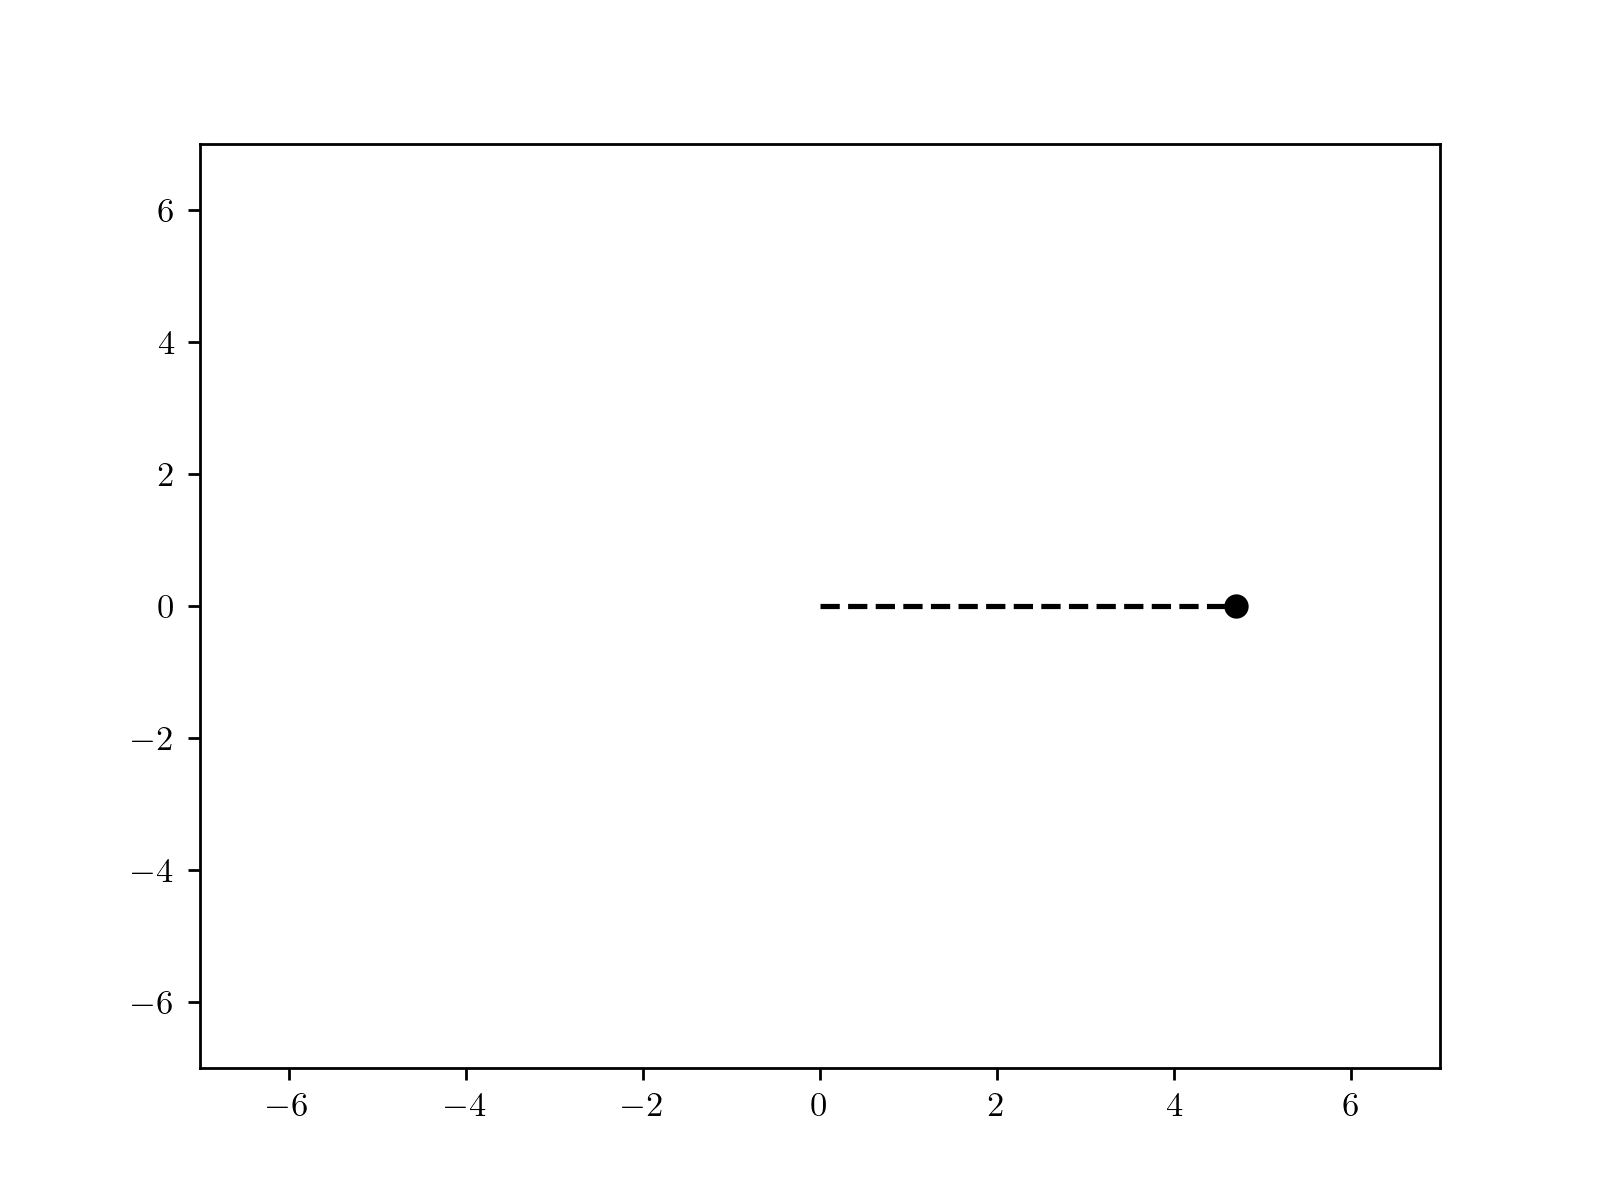

In [92]:
# Only modify lines 24-25 and 28-29!

# time step
dt = 0.1

# velocity
v = 1

# we'll manually build the x and y positions of the marker
# start with a list of 0 values: it starts at the origin
x = [0]
y = [0]

for t in range(100):
    # we'll execute the indented code (lines 13-26)
    # 100 times
    
    if t < 50:
        # Do something for the first half
        
        # x[-1] refers to the most recent value.
        # So, the next value is the most recent value
        # plus or minus something
        x.append(x[-1] + v*dt)
        y.append(y[-1] + 0)
    else:
        # Do something different for the second half
        x.append(x[-1] + 0)
        y.append(y[-1] + v*dt)
        

# Make the figure
fig = plt.figure()
marker = plt.scatter(x[0],y[0],color='k')  # Draw a dot and a line
line, = plt.plot([],[],'k--')
plt.xlim(-7,7)                             # Set the viewing window
plt.ylim(-7,7)
plt.show()

# Animate it (we're using the same update function from cell 5)
ani = animation.FuncAnimation(fig, update, frames=100, interval=20, repeat_delay=300)

        

## Step 7

<IPython.core.display.Javascript object>


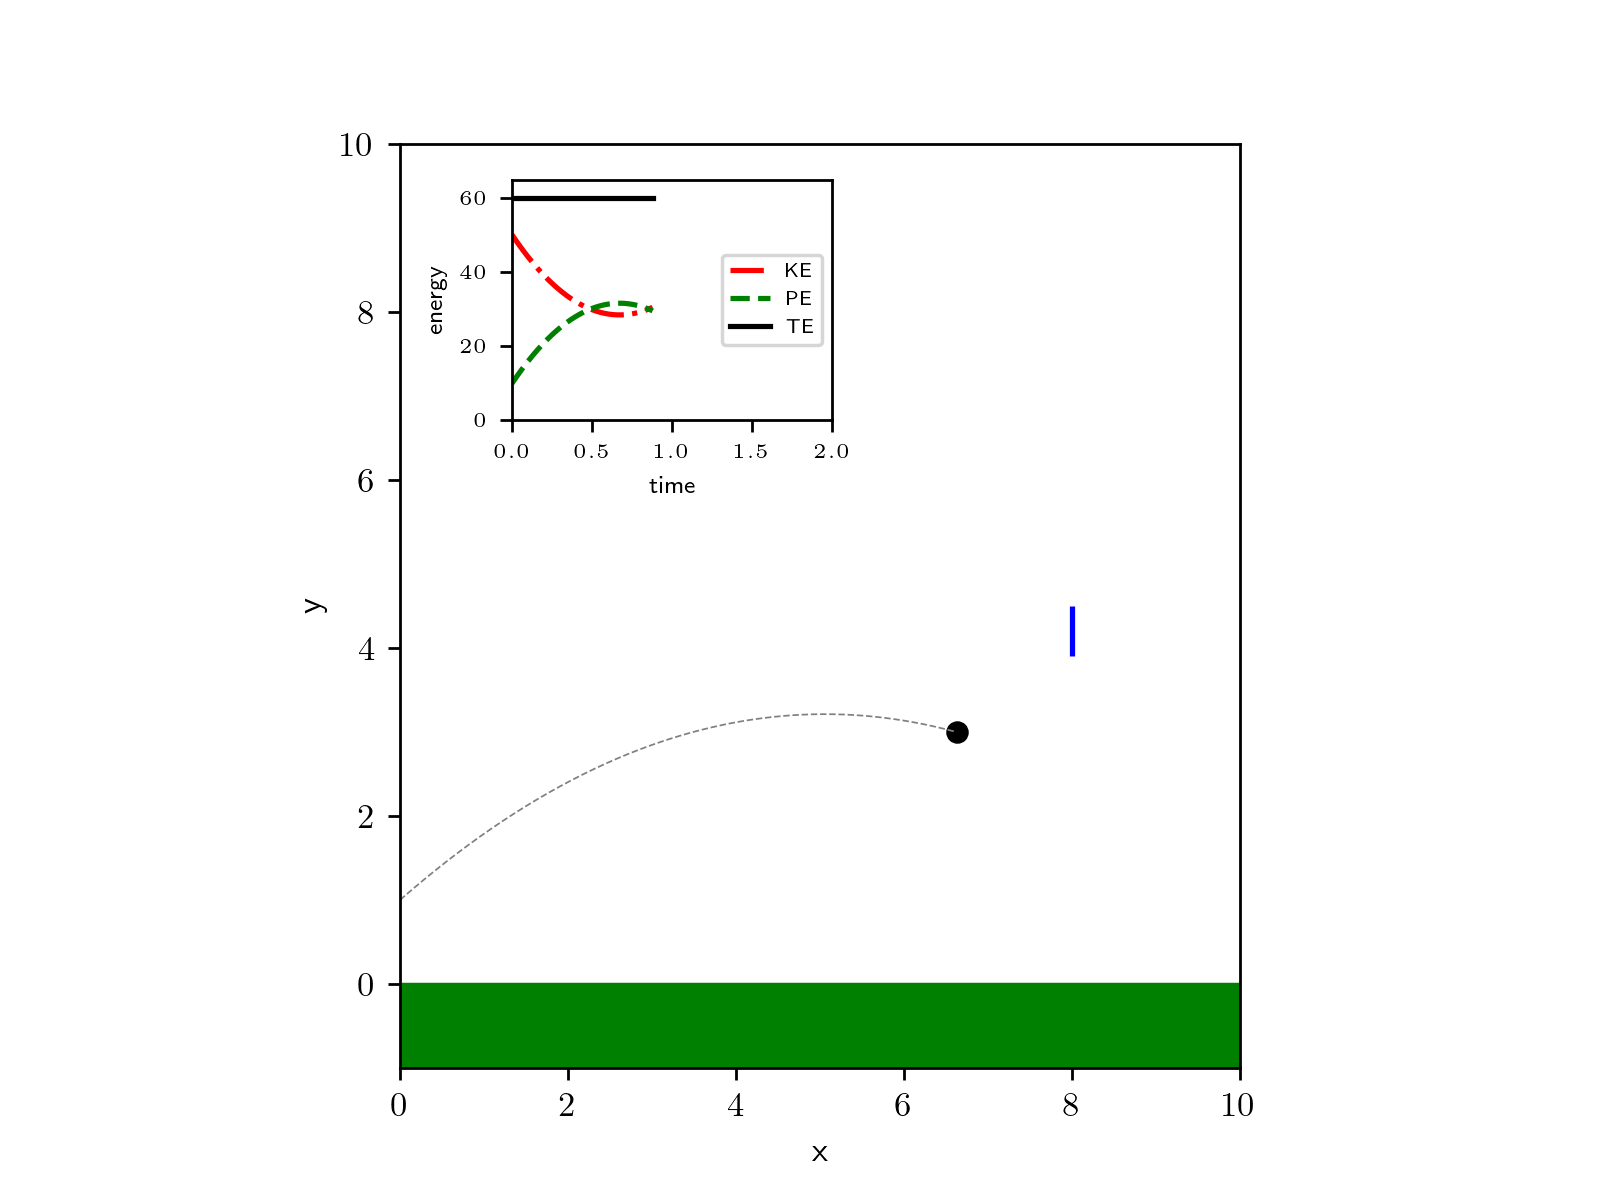

In [95]:
#Parameter value (edit this)     
theta = 41.186   # in degrees

# ====================================
# Don't edit anything below this line
# except for a 1 line tweak inside the
# "derivs" function!
# ====================================

# Functions
def derivs(params,t):
    # Solves ODE for motion of particle q
    
    # what are the current positions and velocities
    # of the projectile and the falling target?
    x,y,vx,vy,y_targ,vy_targ = params
    
    # stop if the ball hits the ground
    if y <= 0: return 0,0,0,0,0,0
    
    # derivative of position is velocity
    x_deriv = vx
    y_deriv = vy
    
    # derivative of velocity is acceleration
    vx_deriv = 0
    vy_deriv = -g
    
    # and for the target...
    y_targ_deriv = vy_targ
    vy_targ_deriv = -g
    
    # return the derivatives
    return x_deriv,y_deriv,vx_deriv,vy_deriv,y_targ_deriv,vy_targ_deriv

def update(i):
    # Used to update animated figure
    marker.set_offsets([xpoints[i*10],ypoints[i*10]])
    line.set_data([xpoints[:i*10],ypoints[:i*10]])
    
    line_KE.set_data(tpoints[:i*10],KE[:i*10])
    line_PE.set_data(tpoints[:i*10],PE[:i*10])
    line_TE.set_data(tpoints[:i*10],TE[:i*10])
    
    marker_targ.set_offsets([8,ypoints_targ[i*10]])

# Parameters and initial conditions
m = 1
g = 9.8
v0 = 10 
theta = math.radians(theta)
vx0 = v0*math.cos(theta)
vy0 = v0*math.sin(theta)
x0 = 0
y0 = 1
y_targ0 = 8
vy_targ0 = 0

tpoints = np.linspace(0,2,1000)         # time

# solve the differential equations
output = odeint(derivs,[x0,y0,vx0,vy0,y_targ0,vy_targ0],tpoints) 

# parse out results
xpoints = output[:,0]                   
ypoints = output[:,1]
vxpoints = output[:,2]
vypoints = output[:,3]
ypoints_targ = output[:,4]
vypoints_targ = output[:,5]

KE = 0.5*m*(vxpoints**2 + vypoints**2)  # calculate kinetic energy
PE = m*g*ypoints                        # calculate potential energy
TE = KE+PE                              # calculate total energy

# Make initial figure (this is gross; ignore it :D )
fig = plt.figure()

# main panel
ax1 = plt.subplot(111)
line, = ax1.plot([],[],c='0.5',lw=0.5,ls='--')
marker = ax1.scatter(x0,0,marker='o',s=30,c='k')
marker_targ = ax1.scatter(8,y_targ0,marker='|',s=200,c='b')
ax1.set_xlim(0,10)
ax1.set_ylim(-1,10)
ax1.set_xlabel('x')
ax1.set_ylabel('y') 
ax1.set_aspect('equal')
plt.fill_between([0,10],y1=0,y2=-1,color='green')

# inset plot for energies
ax2 = fig.add_axes([0.32,0.65,0.2,0.2])
line_KE, = ax2.plot([],[],'r-.',label='KE')
line_PE, = ax2.plot([],[],'g--',label='PE')
line_TE, = ax2.plot([],[],'k-',label='TE')
ax2.set_xlim(0,tpoints[-1])
ax2.set_ylim(np.min(np.hstack((KE,PE,TE)))-0.1,np.max(np.hstack((KE,PE,TE)))+5)
ax2.set_xlabel('time',size='x-small')
ax2.set_ylabel('energy',size='x-small')
ax2.xaxis.set_tick_params(labelsize='xx-small')
ax2.yaxis.set_tick_params(labelsize='xx-small')
ax2.legend(loc='center right',fontsize='xx-small')

plt.show()

# Run animation
ani = animation.FuncAnimation(fig, update, frames=100, interval=20, repeat_delay=300)